In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import eli5
import sklearn
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from eli5.sklearn import PermutationImportance
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

In [2]:
#pip install eli5

In [3]:
heart_data = pd.read_csv('heart_disease_data.csv')

In [4]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#re arrange columns names for clearness
heart_data = heart_data.rename(columns={"cp": "chest_pain_type", "trestbps": "blood_pressure_rate", "fbs": "blood_sugar_status", "ca": "vessels", "chol": "cholesterol_rate"})

In [6]:
heart_data.head()

,age,sex,chest_pain_type,blood_pressure_rate,cholesterol_rate,blood_sugar_status,restecg,thalach,exang,oldpeak,slope,vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart_data.tail()

,age,sex,chest_pain_type,blood_pressure_rate,cholesterol_rate,blood_sugar_status,restecg,thalach,exang,oldpeak,slope,vessels,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
heart_data.shape

(303, 14)

In [9]:
#check duplicate raws in data set
heart_data[heart_data.duplicated(keep=False)]

,age,sex,chest_pain_type,blood_pressure_rate,cholesterol_rate,blood_sugar_status,restecg,thalach,exang,oldpeak,slope,vessels,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
#drop duplicate raws fro data set
heart_data = heart_data.drop_duplicates(keep='first')

In [11]:
#check for Missing values in data set
heart_data.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
blood_pressure_rate    0
cholesterol_rate       0
blood_sugar_status     0
restecg                0
thalach                0
exang                  0
oldpeak                0
slope                  0
vessels                0
thal                   0
target                 0
dtype: int64

In [12]:
heart_data.describe()

,age,sex,chest_pain_type,blood_pressure_rate,cholesterol_rate,blood_sugar_status,restecg,thalach,exang,oldpeak,slope,vessels,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
heart_data.dtypes

age                      int64
sex                      int64
chest_pain_type          int64
blood_pressure_rate      int64
cholesterol_rate         int64
blood_sugar_status       int64
restecg                  int64
thalach                  int64
exang                    int64
oldpeak                float64
slope                    int64
vessels                  int64
thal                     int64
target                   int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026A05D2C880>,
      dtype=object)

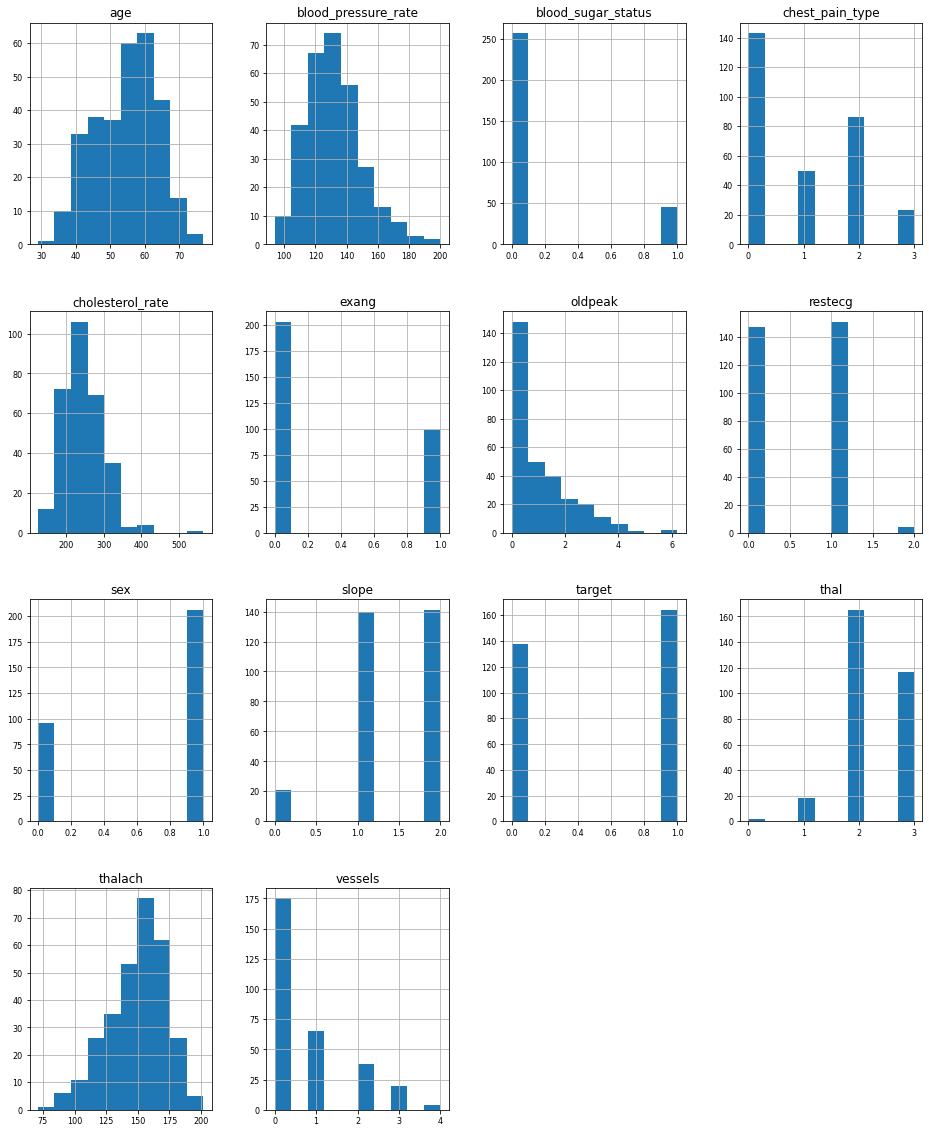

In [14]:
heart_data.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

In [15]:
#identify important features in data set 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
Imp_data = heart_data.copy()
X = Imp_data.iloc[:,0:13]  
y = Imp_data.iloc[:,-1]    
bestfeatures_heart = SelectKBest(score_func=chi2, k=10)
fit_data = bestfeatures_heart.fit(X,y)
dfscores = pd.DataFrame(fit_data.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(12,'Score'))  

                  Specs       Score
7               thalach  186.180286
9               oldpeak   71.692782
11              vessels   71.020719
2       chest_pain_type   62.116086
8                 exang   38.518849
0                   age   22.210517
4      cholesterol_rate   21.690747
3   blood_pressure_rate   15.094591
10                slope    9.677715
1                   sex    7.721690
12                 thal    5.753030
6               restecg    2.877743


[0.07437513 0.05681132 0.11202375 0.05582286 0.05840973 0.02158455
 0.03722324 0.08509447 0.11004845 0.08044463 0.07205048 0.12756198
 0.10854942]


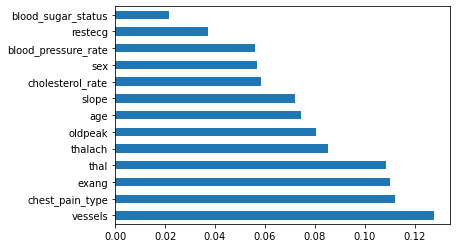

In [16]:
#demonastrate importance using graph
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [17]:
heart_data.corr()

,age,sex,chest_pain_type,blood_pressure_rate,cholesterol_rate,blood_sugar_status,restecg,thalach,exang,oldpeak,slope,vessels,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
chest_pain_type,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
blood_pressure_rate,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
cholesterol_rate,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
blood_sugar_status,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


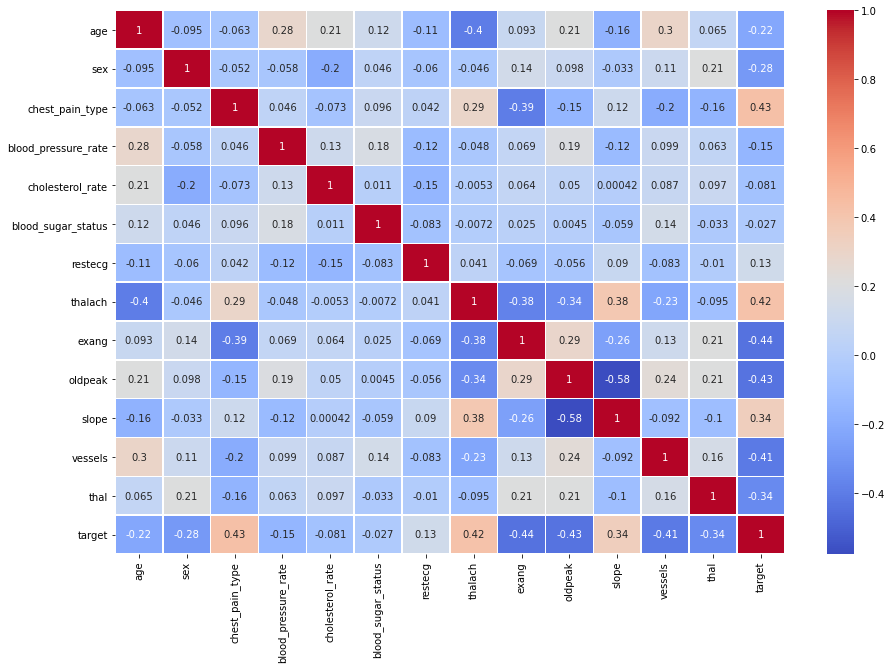

In [18]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(heart_data.corr(),annot=True,cmap='coolwarm',linewidths=.5)

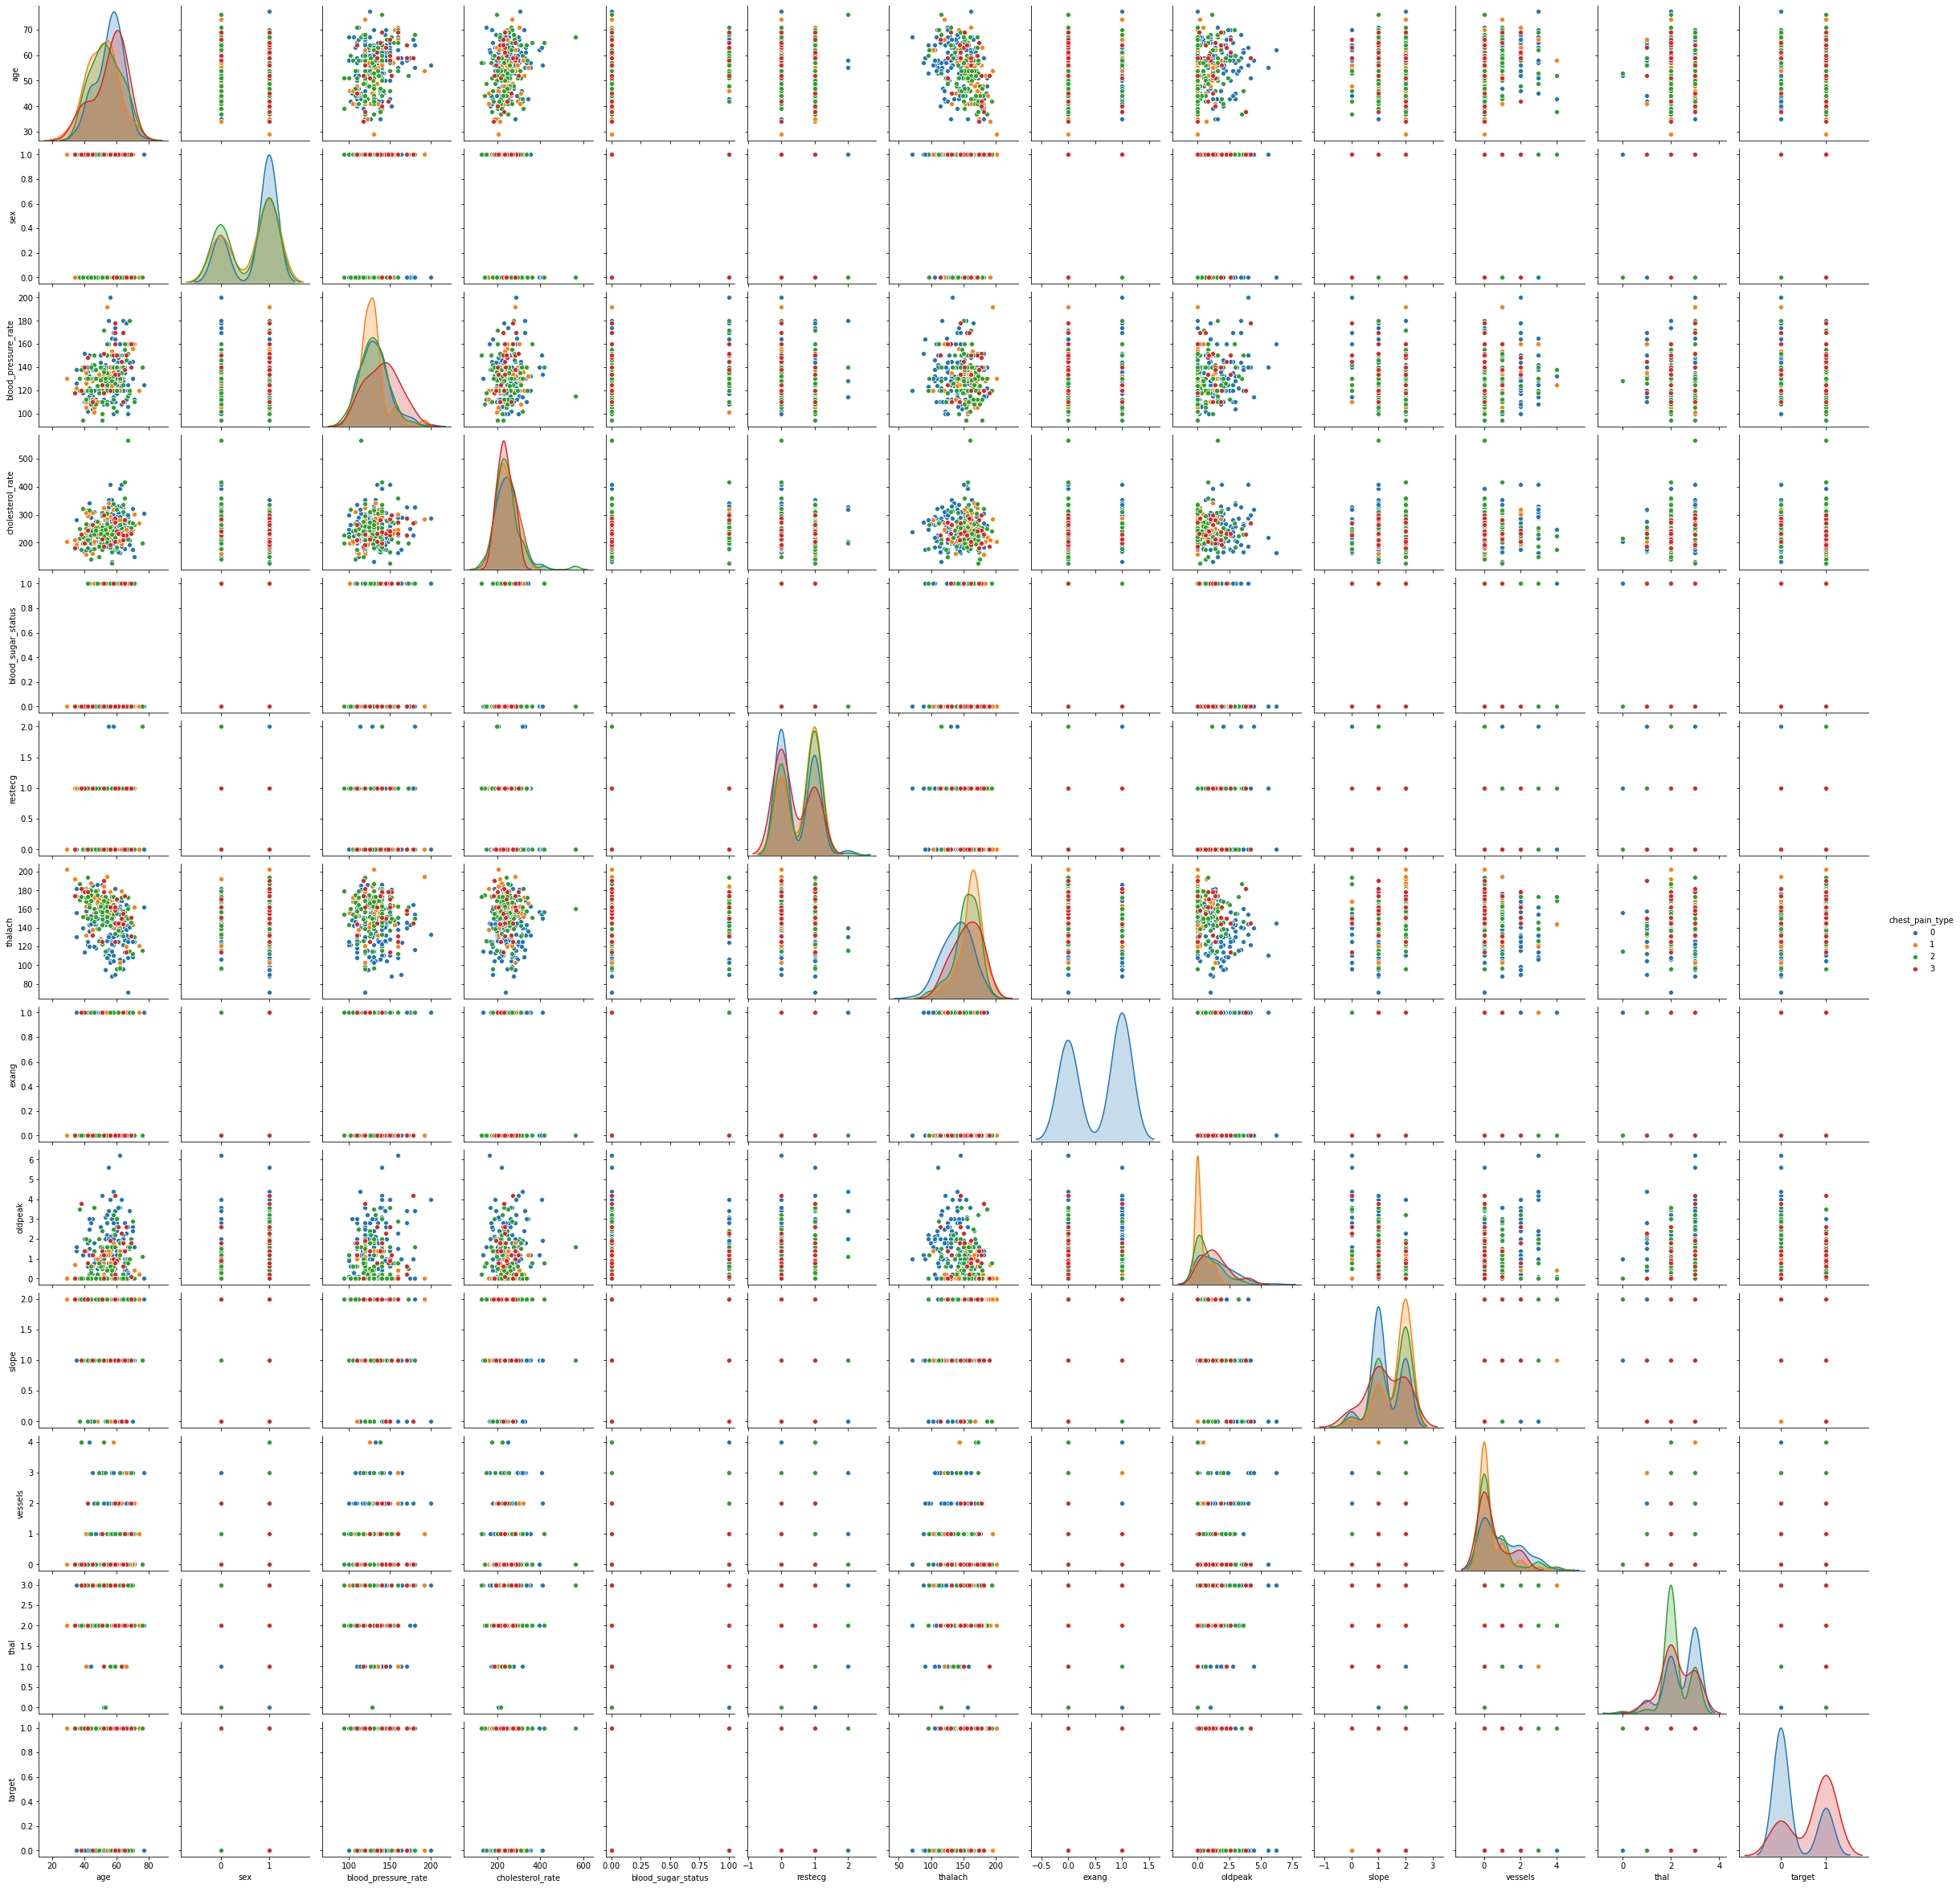

In [19]:
sns.pairplot(heart_data,hue='chest_pain_type')

In [20]:
#re arrange for data analysis
heart_anlz=heart_data.copy()
heart_anlz

,age,sex,chest_pain_type,blood_pressure_rate,cholesterol_rate,blood_sugar_status,restecg,thalach,exang,oldpeak,slope,vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [21]:
heart_anlz['heart_status'] = heart_anlz['target']
heart_anlz['heart_status'] = ["healthy" if x == 0 else "not-healthy" for x in heart_anlz['heart_status']]

In [22]:
heart_anlz['gender'] = heart_anlz['sex']
heart_anlz['gender'] = ['Female' if x == 0 else 'Male' for x in heart_anlz['gender']]

In [23]:
heart_anlz.head()

,age,sex,chest_pain_type,blood_pressure_rate,cholesterol_rate,blood_sugar_status,restecg,thalach,exang,oldpeak,slope,vessels,thal,target,heart_status,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,not-healthy,Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,not-healthy,Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,not-healthy,Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,not-healthy,Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,not-healthy,Female


## Distribution of heart dissease according to gender

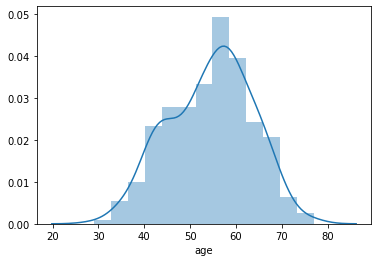

In [24]:
sns.distplot(heart_anlz['age'])

Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

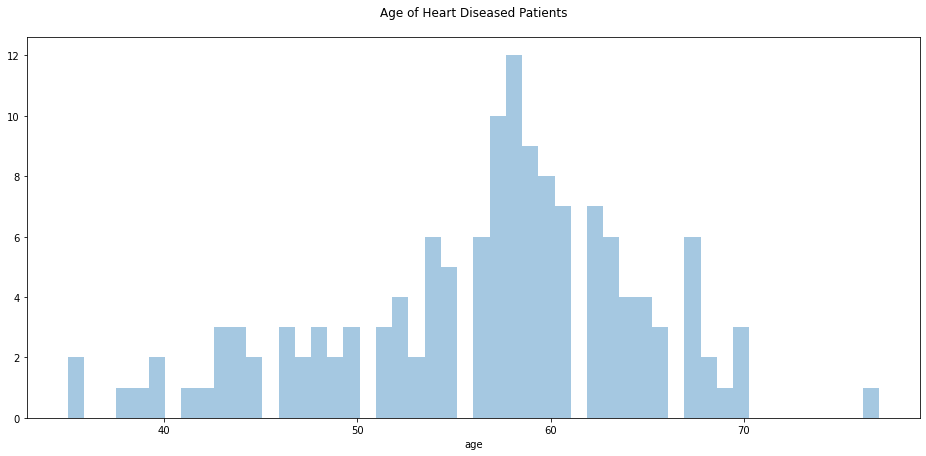

In [25]:
plt.figure(figsize=(16,7))
sns.distplot(heart_anlz[heart_anlz['target']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

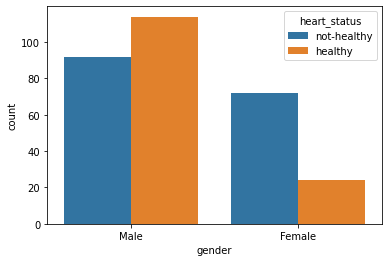

In [26]:

sns.countplot(data=heart_anlz, x='gender', hue='heart_status')

In [27]:
heart_anlz.groupby(['gender', 'heart_status'])['gender'].count()

gender  heart_status
Female  healthy          24
        not-healthy      72
Male    healthy         114
        not-healthy      92
Name: gender, dtype: int64

In [28]:
heart_anlz['sex'].corr(heart_anlz['target'])

-0.2836093577958625

## Distribution of hearts disease according to Thalassemia

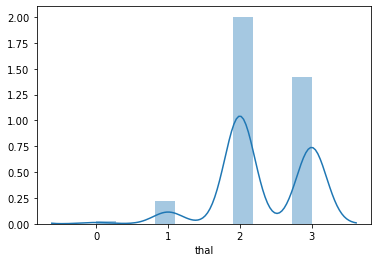

In [29]:

sns.distplot(heart_anlz['thal'])

Text(0.5, 1.0, 'thal of Heart Diseased Patients\n')

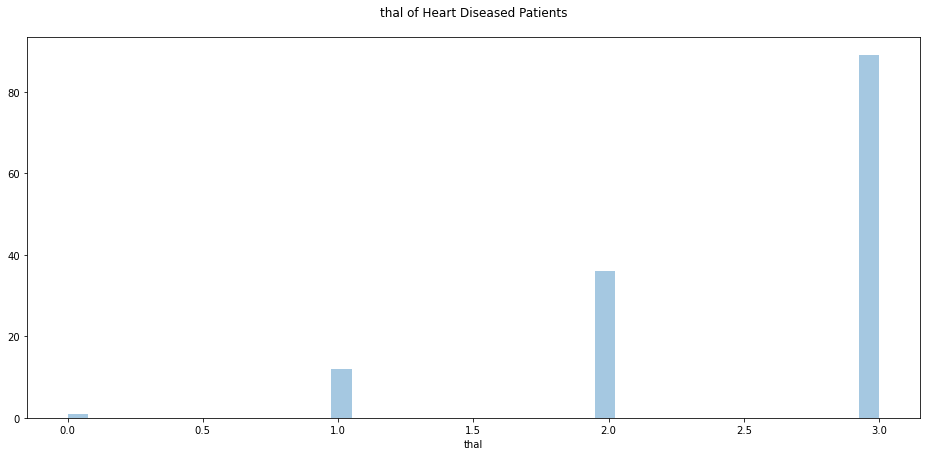

In [30]:
plt.figure(figsize=(16,7))
sns.distplot(heart_anlz[heart_anlz['target']==0]['thal'],kde=False,bins=40)
plt.title('thal of Heart Diseased Patients\n')

Value 1: normal blood flow
Value 2: fixed defect (no blood flow in some part of the heart)
Value 3: reversible defect (a blood flow is observed but it is not normal)


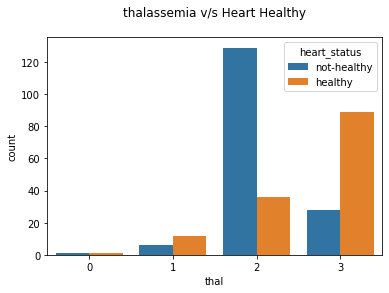

In [31]:
sns.countplot(data=heart_anlz, x='thal', hue='heart_status')
plt.title('thalassemia v/s Heart Healthy\n')
print("Value 1: normal blood flow\nValue 2: fixed defect (no blood flow in some part of the heart)\nValue 3: reversible defect (a blood flow is observed but it is not normal)")

### Distribution of heart disease according to maximum heart rate(thalach)

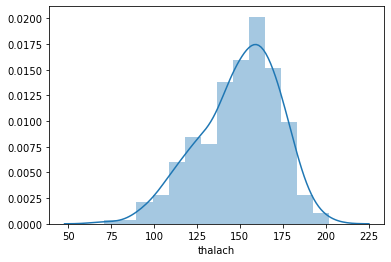

In [32]:
sns.distplot(heart_anlz['thalach'])

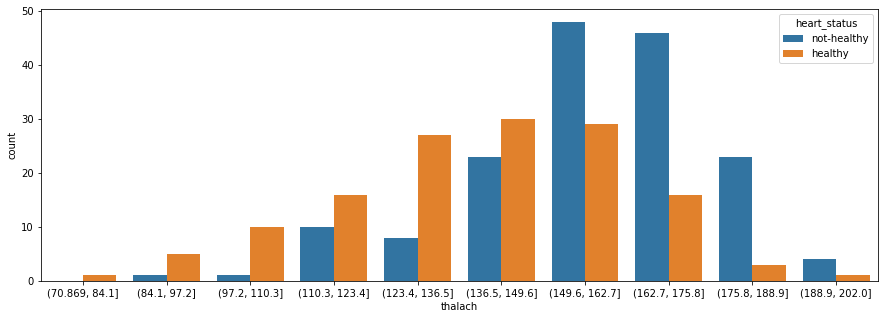

In [33]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=heart_anlz, x=pd.cut(heart_anlz['thalach'], 10), hue='heart_status')

In [34]:
heart_anlz['thalach'].corr(heart_anlz['target'])

0.41995504366386954

## Distribution of heart disease according to chest pain

Value 0: asymptomatic
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: typical angina


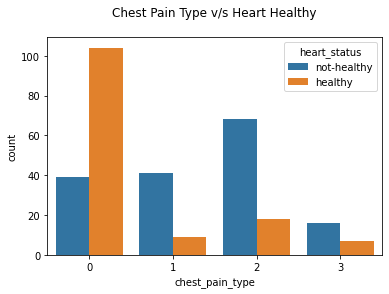

In [35]:

sns.countplot(data=heart_anlz, x='chest_pain_type', hue='heart_status')
plt.title('Chest Pain Type v/s Heart Healthy\n')
print("Value 0: asymptomatic\nValue 1: atypical angina\nValue 2: non-anginal pain\nValue 3: typical angina")

In [36]:
heart_anlz['chest_pain_type'].corr(heart_anlz['target'])

0.432079591566407

## Distribution of heart disease between number of heart vessels 

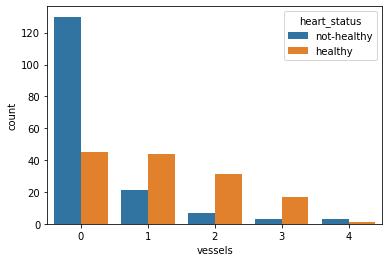

In [37]:
sns.countplot(data=heart_anlz, x='vessels', hue='heart_status')

In [38]:
heart_anlz['vessels'].corr(heart_anlz['target'])

-0.4089919797569272

## Distribution of heart disease according to rest ecg

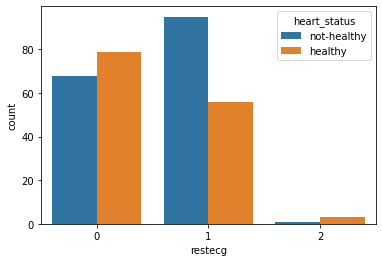

In [39]:
sns.countplot(data=heart_anlz, x='restecg', hue='heart_status')

In [40]:
heart_anlz['restecg'].corr(heart_anlz['target'])

0.1348744470286458

## Distribution of heart disease according to slope

Value 0: Upsloping
Value 1: Flat
Value 2: Downsloping


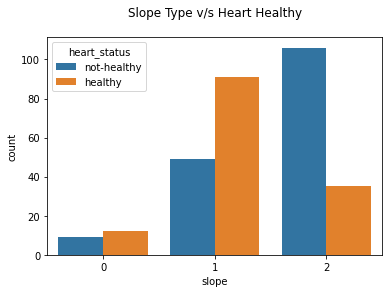

In [41]:
sns.countplot(data=heart_anlz, x='slope', hue='heart_status')
plt.title('Slope Type v/s Heart Healthy\n')
print("Value 0: Upsloping\nValue 1: Flat\nValue 2: Downsloping")

In [42]:
heart_anlz['slope'].corr(heart_anlz['target'])

0.34393953248938663

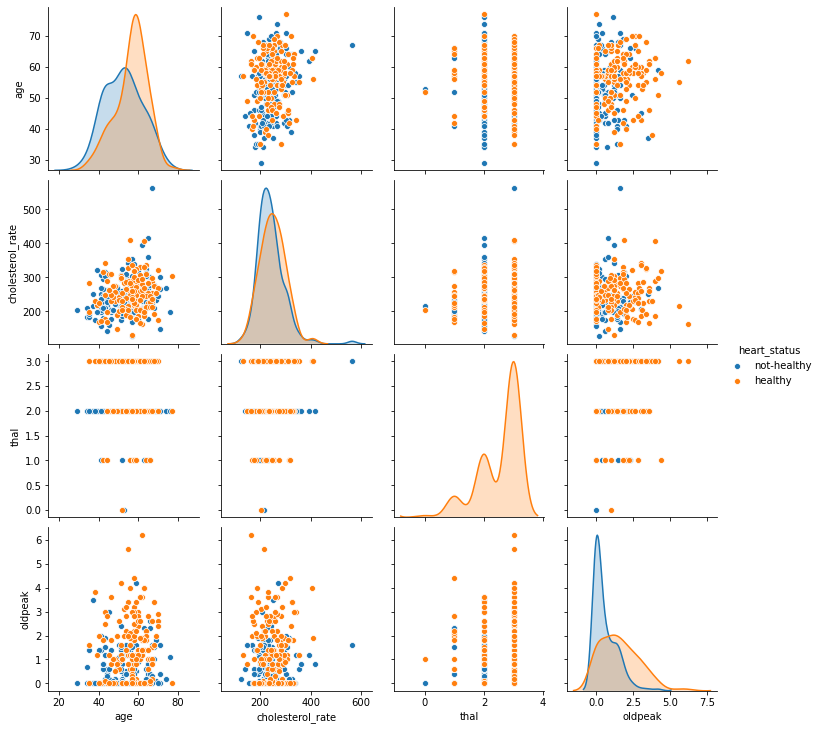

In [43]:
sns.pairplot(heart_anlz , vars = ['age', 'cholesterol_rate', 'thal', 'oldpeak'], hue='heart_status')

### Scale features 

In [44]:
heart_anlz_new=heart_anlz.copy()

In [45]:
heart_anlz_new.head(10)

,age,sex,chest_pain_type,blood_pressure_rate,cholesterol_rate,blood_sugar_status,restecg,thalach,exang,oldpeak,slope,vessels,thal,target,heart_status,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,not-healthy,Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,not-healthy,Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,not-healthy,Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,not-healthy,Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,not-healthy,Female
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,not-healthy,Male
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,not-healthy,Female
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,not-healthy,Male
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,not-healthy,Male
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,not-healthy,Male


In [46]:
HeartDataScaler = StandardScaler()
scale_col = ['age', 'blood_pressure_rate', 'cholesterol_rate', 'thalach', 'oldpeak']
heart_anlz_new[scale_col] = HeartDataScaler.fit_transform(heart_anlz_new[scale_col])

In [47]:
heart_anlz_new.head()

,age,sex,chest_pain_type,blood_pressure_rate,cholesterol_rate,blood_sugar_status,restecg,thalach,exang,oldpeak,slope,vessels,thal,target,heart_status,gender
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1,not-healthy,Male
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1,not-healthy,Male
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1,not-healthy,Female
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1,not-healthy,Male
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1,not-healthy,Female


### One-hot encode for  relavant features(categorical)

In [48]:
heart_anlz_new = pd.get_dummies(heart_data, columns = ['sex', 'chest_pain_type', 'blood_sugar_status', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

In [49]:
heart_anlz_new.head()

,age,blood_pressure_rate,cholesterol_rate,thalach,oldpeak,vessels,target,sex_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,blood_sugar_status_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.8,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.6,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0


### Prepare features and target

In [50]:
Hart_features = heart_anlz_new.drop(['target'], axis = 1)
Hart_labels = heart_anlz_new['target']

### Create training and test data

In [51]:
features_train , features_test, labels_train, labels_test = train_test_split(Hart_features, Hart_labels, test_size= 0.2, random_state=42)

## Logistic Regression

In [52]:
logi_hart = LogisticRegression( solver='lbfgs')
logi_hart.fit(features_train,labels_train)
logi_hart.score(features_test,labels_test)


Hart_score = round(logi_hart.score(features_test,labels_test), 3) *100
print(f"Accuracy Of predict Heart disease {Hart_score}%")

Accuracy Of predict Heart disease 85.2%


### Analyze important features

In [53]:
perm_hart_logi = PermutationImportance(logi_hart, random_state=1).fit(features_test, labels_test)
eli5.show_weights(perm_hart_logi, feature_names = features_test.columns.tolist())

Weight,Feature
0.0623 ± 0.0482,vessels
0.0328 ± 0.0587,thalach
0.0295 ± 0.0382,restecg_1
0.0262 ± 0.0491,oldpeak
0.0164 ± 0.0359,sex_1
0.0131 ± 0.0245,thal_2
0.0098 ± 0.0161,slope_2
0.0066 ± 0.0161,blood_pressure_rate
0.0033 ± 0.0321,thal_3
0.0033 ± 0.0131,cholesterol_rate


### Accuracy measure with confusion matrix (Logistic Regression)

Text(0.5, 1.0, ' Confusion Matrix of Hart disease ')

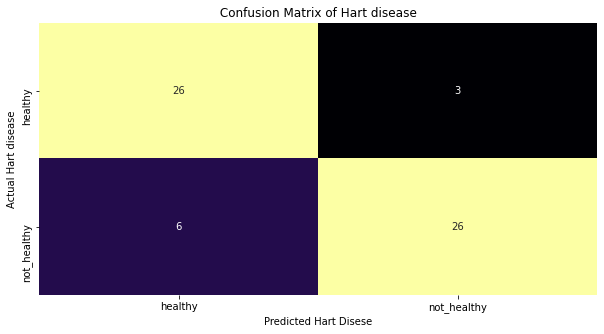

In [54]:
lbl_pred = logi_hart.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(labels_test, lbl_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='inferno', cbar=False, xticklabels=['healthy', 'not_healthy'], yticklabels=['healthy', 'not_healthy'])
plt.xlabel('Predicted Hart Disese')
plt.ylabel('Actual Hart disease')
plt.title(' Confusion Matrix of Hart disease ')

In [55]:
Hart_predi = logi_hart.predict(features_test)
print(classification_report(labels_test, Hart_predi, target_names = ['healthy', 'not_healthy']))


              precision    recall  f1-score   support

     healthy       0.81      0.90      0.85        29
 not_healthy       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



## Roc Curve (Logistic Regression)

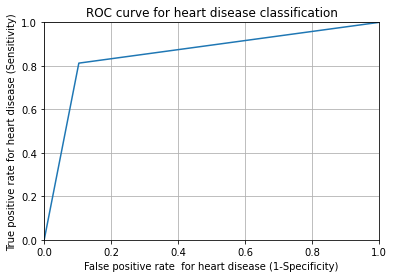

In [56]:
fp_rate, tp_rate, thresholds = roc_curve(labels_test, Hart_predi)
plt.plot(fp_rate,tp_rate)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for heart disease classification')
plt.xlabel('False positive rate  for heart disease (1-Specificity)')
plt.ylabel('True positive rate for heart disease (Sensitivity)')
plt.grid(True)

In [57]:
roc_score_logi=round(sklearn.metrics.roc_auc_score(labels_test, Hart_predi),5)
print(f"Accuracy Of predict Heart disease according to ROC Curve {roc_score_logi}")

Accuracy Of predict Heart disease according to ROC Curve 0.85453


### Naive Bayes

In [58]:
nb_heart = GaussianNB()
nb_heart.fit(features_train, labels_train)
nb_heart.score(features_test,labels_test)

nb_score = round(nb_heart.score(features_test,labels_test), 3) *100

print(f"Accuracy Of predict Heart disease {nb_score}%")

Accuracy Of predict Heart disease 86.9%


### Analyze important features

In [59]:
perm_heart_nb = PermutationImportance(nb_heart, random_state=1).fit(features_test, labels_test)
eli5.show_weights(perm_heart_nb, feature_names = features_test.columns.tolist())

Weight,Feature
0.0492 ± 0.0587,thal_3
0.0426 ± 0.0675,exang_1
0.0393 ± 0.0334,thal_2
0.0361 ± 0.0321,oldpeak
0.0328 ± 0.0359,thalach
0.0328 ± 0.0000,chest_pain_type_3
0.0295 ± 0.0564,vessels
0.0262 ± 0.0161,chest_pain_type_2
0.0262 ± 0.0161,sex_1
0.0197 ± 0.0245,slope_2


### Accuracy measure with confusion matrix (Naive Bayes)

Text(0.5, 1.0, ' Confusion Matrix of Hart disease ')

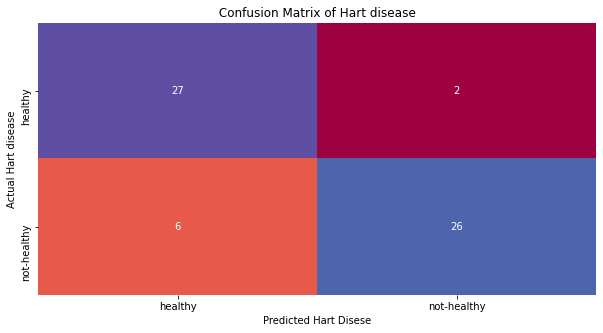

In [60]:
lbl_pred_nb = nb_heart.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat_nb = confusion_matrix(labels_test, lbl_pred_nb)
sns.heatmap(conf_mat_nb, annot=True, fmt='d', cmap='Spectral', cbar=False, xticklabels=['healthy', 'not-healthy'], yticklabels=['healthy', 'not-healthy'])
plt.xlabel('Predicted Hart Disese')
plt.ylabel('Actual Hart disease')
plt.title(' Confusion Matrix of Hart disease ')

In [61]:
print(classification_report(labels_test, lbl_pred_nb, target_names = ['healthy', 'not_healthy']))

              precision    recall  f1-score   support

     healthy       0.82      0.93      0.87        29
 not_healthy       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



### ROC Curve (Naive Bayes)

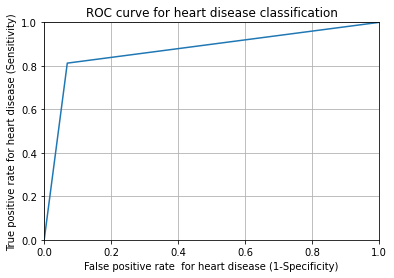

In [62]:
fp_rate, tp_rate, thresholds = roc_curve(labels_test, lbl_pred_nb)
plt.plot(fp_rate,tp_rate)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for heart disease classification')
plt.xlabel('False positive rate  for heart disease (1-Specificity)')
plt.ylabel('True positive rate for heart disease (Sensitivity)')
plt.grid(True)

In [63]:
roc_score_nb=round(sklearn.metrics.roc_auc_score(labels_test, lbl_pred_nb),5)
print(f"Accuracy Of predict Heart disease according to ROC Curve {roc_score_nb}")

Accuracy Of predict Heart disease according to ROC Curve 0.87177


### Coeffecient according to logistic regression

In [64]:
print(logi_hart.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logi_hart.coef_.ravel(),Hart_features.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients

[-0.00380596]


,Coeffecient
chest_pain_type_2,1.210448
thal_2,0.704523
restecg_1,0.465215
slope_2,0.462515
chest_pain_type_3,0.417482
blood_sugar_status_1,0.385978
chest_pain_type_1,0.193675
thal_1,0.111375
thalach,0.021709
age,0.018493


<Figure size 720x864 with 0 Axes>